# Predicting Diabetes Using Naive Bayes

### Objective
- Apply Naive Bayes for binary classification.
- Practice data exploration and preprocessing.
- Evaluate model performance using appropriate metrics.
- Understand and interpret the log probabilities used in Naive Bayes.

### Dataset
This lab uses the Pima Indians Diabetes Dataset from the UCI Machine Learning Repository. It contains 8 features based on medical information, with a binary target indicating the presence of diabetes (1) or absence (0).

### Features
`Pregnancies`: Number of times pregnant
`Glucose`: Plasma glucose concentration
`BloodPressure`: Diastolic blood pressure (mm Hg)
`SkinThickness`: Triceps skinfold thickness (mm)
`Insulin`: 2-Hour serum insulin (mu U/ml)
`BMI`: Body mass index (weight in kg/(height in m)^2)
`DiabetesPedigreeFunction`: Diabetes pedigree function (a function based on family history)
`Age`: Age (years)
`Outcome`: Class variable (1 if patient has diabetes, 0 otherwise)

### Import packages

In [35]:
# Import the necessary libraries for data manipulation, model training, and evaluation.
# your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Exploration

In [37]:
# Load the Pima Indiands Diabetes Dataset in the folder ../data and preview the data
# Display summary statistics
# your code here

import pandas as pd

# Load the dataset
file_path = '/Users/ricardomontoyasantos/Desktop/DSML/W13D2-lab-naive-bayes/data/pima_diabetes.csv'
df = pd.read_csv(file_path)

# Show basic info and first few rows
df_info = df.info()
df_head = df.head()

df_info
df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

### Data Cleaning

1. *Handling Missing Values*: Replace 0 values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with their respective median values.
2. *Split Data*: Separate the feature columns (X) and target (y), and then split into training and test sets with an 80-20 split.

In [40]:
# your code here
from sklearn.model_selection import train_test_split

# Make a copy of the dataset to clean
df_cleaned = df.copy()

# Columns where 0 is likely a placeholder for missing values
cols_with_missing_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with the median of each column
for col in cols_with_missing_zeros:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].replace(0, median_val)

# Separate features and target
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes for confirmation
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((614, 8), (154, 8), (614,), (154,))

### Train a Naïve Bayes Classifier

Since the features are continuous, we need to use the `GaussianNB` model instead of the ones we used so far for categorical variables

In [42]:
# your code here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)


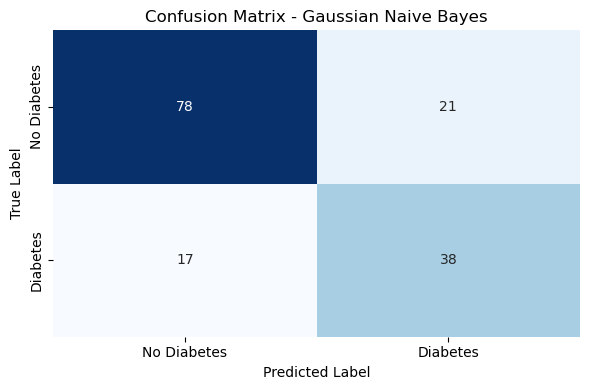

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.tight_layout()
plt.show()

### Model Evaluation

Evaluate the model's accuracy, precision and recall. Analyse the confusion matrix.
Give the setting of the problem, which metrics would you privilege?

In [45]:
# your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print(f"Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall   : {recall:.2%}")

Model Evaluation Metrics:
Accuracy : 75.32%
Precision: 64.41%
Recall   : 69.09%


In this medical context, the most important metric is **recall, which is 69.09% in our model**. This means the model correctly identifies about **7 out of 10 people who actually have diabetes**. In healthcare, especially when detecting diseases, it’s much more dangerous to miss a sick person than to wrongly suspect someone is ill. Missing a diabetic case (a false negative) could delay treatment and lead to serious health problems. That’s why we prioritize recall — we want to catch as many real cases as possible, even if that means doing some extra tests on people who turn out to be healthy.

### Exploring Log Probabilities in Naïve Bayes

Naive Bayes calculates log probabilities (logprobs) for each class to make predictions. Let's use `predict_log_proba` to calculate the log probabilities for each class (diabetes vs. no diabetes) for a few samples in the test set.

Question: For a given instance in the test set, calculate the log probabilities for each class (diabetes vs. no diabetes) and interpret the values. How does Naive Bayes decide the predicted class based on these log probabilities?

In [49]:
# Select a few samples from the test set
sample_indices = [0, 1, 12]  # Change these indices as desired
X_sample = X_test.iloc[sample_indices]

# Calculate log probabilities for each class
log_probs = nb_classifier.predict_log_proba(X_sample)

# Display results
for i, index in enumerate(sample_indices):
    print(f"Sample {index} - Log Probabilities:")
    print(f"No Diabetes (0): {log_probs[i][0]:.4f}, Diabetes (1): {log_probs[i][1]:.4f}")
    print(f"Predicted Class: {nb_classifier.predict(X_sample.iloc[[i]])[0]}")
    print()

Sample 0 - Log Probabilities:
No Diabetes (0): -0.2415, Diabetes (1): -1.5391
Predicted Class: 0

Sample 1 - Log Probabilities:
No Diabetes (0): -0.0728, Diabetes (1): -2.6562
Predicted Class: 0

Sample 12 - Log Probabilities:
No Diabetes (0): -0.9818, Diabetes (1): -0.4694
Predicted Class: 1



Naive Bayes calculates the log probabilities for each class — in this case, diabetes (1) and no diabetes (0). It then compares the two values and chooses the class with the higher log probability (i.e., the less negative one). So, if the log probability of class 0 is higher than that of class 1, it predicts no diabetes. This is how it decides the predicted class.

- Interpretation of Log Probabilities: Log probabilities represent the logarithm of the probability for each class. A higher log probability (closer to zero, since log values are negative) indicates a higher likelihood for that class.
- Decision-Making: The model predicts the class with the highest log probability. If the log probability for Diabetes (1) is higher (closer to zero) than for No Diabetes (0), the model will predict Diabetes (1).

Convert log probabilities back to regular probabilities using np.exp(log_probs) to see how log transformations aid computation without changing predictions.

In [74]:
# your code here
# Convert log probabilities back to regular probabilities using np.exp(log_probs) to see how log transformations
#aid computation without changing predictions.
    
probs = np.exp(log_probs)

probs

array([[7.85425769e-01, 2.14574231e-01],
       [9.29784159e-01, 7.02158406e-02],
       [9.81480070e-01, 1.85199304e-02],
       [8.48221252e-01, 1.51778748e-01],
       [4.51265934e-01, 5.48734066e-01],
       [4.53816717e-01, 5.46183283e-01],
       [9.98589478e-01, 1.41052237e-03],
       [7.25466268e-01, 2.74533732e-01],
       [5.05157637e-01, 4.94842363e-01],
       [2.28323196e-01, 7.71676804e-01],
       [7.64669387e-01, 2.35330613e-01],
       [1.28459969e-02, 9.87154003e-01],
       [3.74643385e-01, 6.25356615e-01],
       [7.87476565e-01, 2.12523435e-01],
       [9.85044118e-01, 1.49558823e-02],
       [7.36124650e-01, 2.63875350e-01],
       [9.42074621e-01, 5.79253794e-02],
       [9.76552441e-01, 2.34475593e-02],
       [2.37640310e-01, 7.62359690e-01],
       [6.98573132e-01, 3.01426868e-01],
       [8.96650278e-01, 1.03349722e-01],
       [9.63944024e-01, 3.60559759e-02],
       [9.58091742e-02, 9.04190826e-01],
       [9.80672831e-01, 1.93271686e-02],
       [3.298151

Change your decision treshold so that either class 1 or 0 becomes more frequent in order to optimize your preferred metric (precision or recall) for this problem. Try multiple tresholds until you are satisfied with your choice.

In [80]:
treshold = 0.5 # adjust this number to make it easier/harder to classify someone as diabetic


# Calculate log probabilities for each class
log_probs = nb_classifier.predict_log_proba(X_test)

#compute probability of No Diabetes (0) vs Diabetes (1)
probabilities = []
for i, index in enumerate(X_test.index):
    prediction = 0 if np.exp(log_probs[i][0]) >= treshold else 1
    probabilities.append({'index':index,'no_diab_prob': np.exp(log_probs[i][0]), 'diab_prob': np.exp(log_probs[i][0]), 'prediction':prediction})

probabilities = pd.DataFrame(probabilities)
probabilities.head()




,index,no_diab_prob,diab_prob,prediction
0,668,0.785426,0.785426,0
1,324,0.929784,0.929784,0
2,624,0.981480,0.981480,0
3,690,0.848221,0.848221,0
4,473,0.451266,0.451266,1


In [94]:

treshold = 0.1 # adjust this number to make it easier/harder to classify someone as diabetic


# Calculate log probabilities for each class
log_probs = nb_classifier.predict_log_proba(X_test)

#compute probability of No Diabetes (0) vs Diabetes (1)
probabilities = []
for i, index in enumerate(X_test.index):
    prediction = 0 if np.exp(log_probs[i][0]) >= treshold else 1
    probabilities.append({'index':index,'no_diab_prob': np.exp(log_probs[i][0]), 'diab_prob': np.exp(log_probs[i][0]), 'prediction':prediction})

probabilities = pd.DataFrame(probabilities)
probabilities.head()

,index,no_diab_prob,diab_prob,prediction
0,668,0.785426,0.785426,0
1,324,0.929784,0.929784,0
2,624,0.981480,0.981480,0
3,690,0.848221,0.848221,0
4,473,0.451266,0.451266,0


In [96]:
treshold = 0.70 # adjust this number to make it easier/harder to classify someone as diabetic


# Calculate log probabilities for each class
log_probs = nb_classifier.predict_log_proba(X_test)

#compute probability of No Diabetes (0) vs Diabetes (1)
probabilities = []
for i, index in enumerate(X_test.index):
    prediction = 0 if np.exp(log_probs[i][0]) >= treshold else 1
    probabilities.append({'index':index,'no_diab_prob': np.exp(log_probs[i][0]), 'diab_prob': np.exp(log_probs[i][0]), 'prediction':prediction})

probabilities = pd.DataFrame(probabilities)
probabilities.head()

,index,no_diab_prob,diab_prob,prediction
0,668,0.785426,0.785426,0
1,324,0.929784,0.929784,0
2,624,0.981480,0.981480,0
3,690,0.848221,0.848221,0
4,473,0.451266,0.451266,1


In [98]:
treshold = 0.85 # adjust this number to make it easier/harder to classify someone as diabetic


# Calculate log probabilities for each class
log_probs = nb_classifier.predict_log_proba(X_test)

#compute probability of No Diabetes (0) vs Diabetes (1)
probabilities = []
for i, index in enumerate(X_test.index):
    prediction = 0 if np.exp(log_probs[i][0]) >= treshold else 1
    probabilities.append({'index':index,'no_diab_prob': np.exp(log_probs[i][0]), 'diab_prob': np.exp(log_probs[i][0]), 'prediction':prediction})

probabilities = pd.DataFrame(probabilities)
probabilities.head()

,index,no_diab_prob,diab_prob,prediction
0,668,0.785426,0.785426,1
1,324,0.929784,0.929784,0
2,624,0.981480,0.981480,0
3,690,0.848221,0.848221,1
4,473,0.451266,0.451266,1


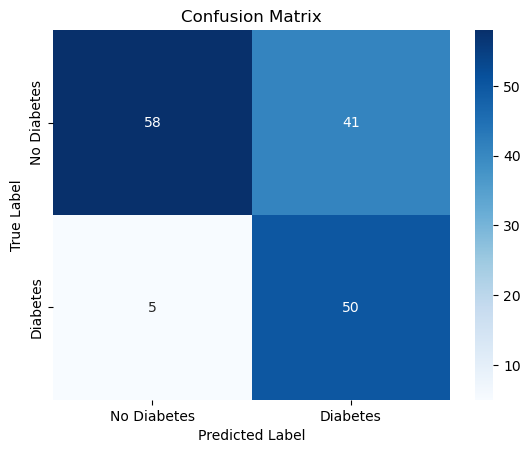

In [100]:
# create the confusion matrix for the adjusted problem
y_pred_adjusted = probabilities['prediction']
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()